<a href="https://colab.research.google.com/github/Hamid-Mofidi/Diffusion-Models/blob/main/GMM_noising/CIFAR_10_dataset_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import fetch_openml
import torchvision
from torchvision import transforms

In [ ]:
# Parameters for generating Gaussian distributions
n_clusters = 100

In [ ]:
#CIFAR-10 dataset: Each image is a 32x32 pixel image and there are 60,000 such images.
# Thus, shape of X is (60000, 32x32), where 32x32 is the flattened size of each image (32 * 32)

def CIFAR10_dataset(random_seed=42):
    # Set NumPy random seed
    np.random.seed(random_seed)

    # Load CIFAR-10 dataset
    # Define a transform to normalize the data
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    # Download the CIFAR-10 training set
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

    # Extract features and labels
    X_cifar10, y_cifar10 = trainset.data, trainset.targets

    # Convert X_cifar10 and y_cifar10 to NumPy arrays
    X_cifar10_np = np.array(X_cifar10)
    y_cifar10_np = np.array(y_cifar10)

    # Print the shapes
    print("X_cifar10 shape:", X_cifar10_np.shape)
    print("y_cifar10 shape:", y_cifar10_np.shape)

    # Select a subset of the data (e.g., first 10,000 samples)
    subset_size = n_clusters
    a_subset, b_subset = X_cifar10_np[:subset_size], y_cifar10_np[:subset_size]

    return a_subset, b_subset

In [ ]:
# Load CIFAR-10 data
a_subset, b_subset = CIFAR10_dataset(random_seed=42)

100%|██████████| 170498071/170498071 [00:02<00:00, 69982426.24it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
X_cifar10 shape: (50000, 32, 32, 3)
y_cifar10 shape: (50000,)


In [ ]:
print(a_subset.shape)
print(b_subset.shape)
print(a_subset[0].shape)

(100, 32, 32, 3)
(100,)
(32, 32, 3)


In [ ]:


# Create an array X of size n_clusters x 784 x 1
X = np.zeros((n_clusters, 32 * 32 * 3, 1))

# Reshape and store elements from a_subset in X
for i in range(n_clusters):
    X[i] = a_subset[i].reshape(-1, 1)/ 255.0  # Normalize by dividing by 255.0

print(X.shape)
print(X[0].shape)
print('first image is =', b_subset[0])
print('Second image is =',b_subset[1])


(100, 3072, 1)
(3072, 1)
first image is = 6
Second image is = 9


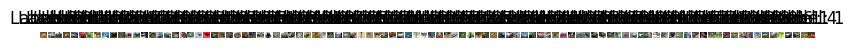

In [ ]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(1, n_clusters, figsize=(10, 3))


# Reshape and plot each image horizontally
for i in range(n_clusters):
    image_to_plot = X[i].reshape(32, 32, 3)
    axs[i].imshow(image_to_plot, cmap='gray')
    axs[i].set_title(f"Label: {b_subset[i]}")
    axs[i].axis('off')

plt.show()

In [ ]:
def plot_noisy_images(X, n_clusters):
    fig, axes = plt.subplots(n_clusters, 2, figsize=(8, 2 * n_clusters))

    for i in range(n_clusters):
      # Plot original image
      axes[i, 0].imshow(X[i].reshape(32, 32, 3))


      # Plot noised image
      axes[i, 1].imshow(X_noised[i].reshape(32, 32, 3))


plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
def plot_CIFAR10_histograms(X, n_clusters):
    fig, ax = plt.subplots(figsize=(6, 4))

    for i in range(n_clusters):
        ax.hist(X[i].flatten(), bins=50, alpha=0.5)

    ax.set_title('Histograms of Different Clusters')
    ax.set_xlabel('Feature Value (Normalized)')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()

<ipython-input-9-f0775634957b>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


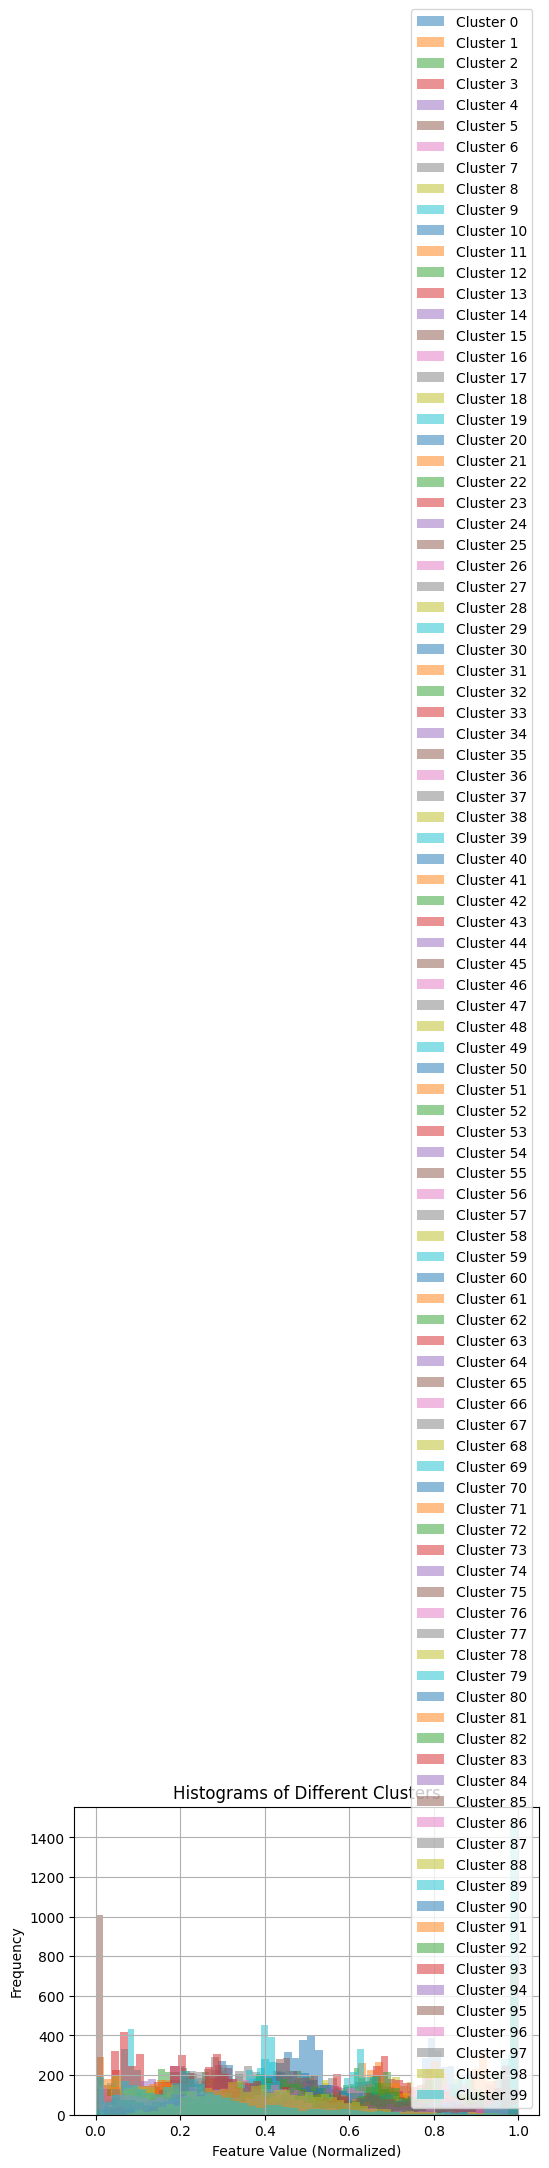

In [ ]:
# Plot histograms for each cluster in X
plot_CIFAR10_histograms(X, n_clusters)

In [ ]:
def add_noise(X, diffusion_steps, eps):
    X_noised = X.copy()
    noise = np.random.normal(size=X.shape)

    for j in range(diffusion_steps):
        X_noised = np.sqrt(1 - eps) * X_noised + np.sqrt(eps) * noise

    return X_noised

<ipython-input-9-f0775634957b>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


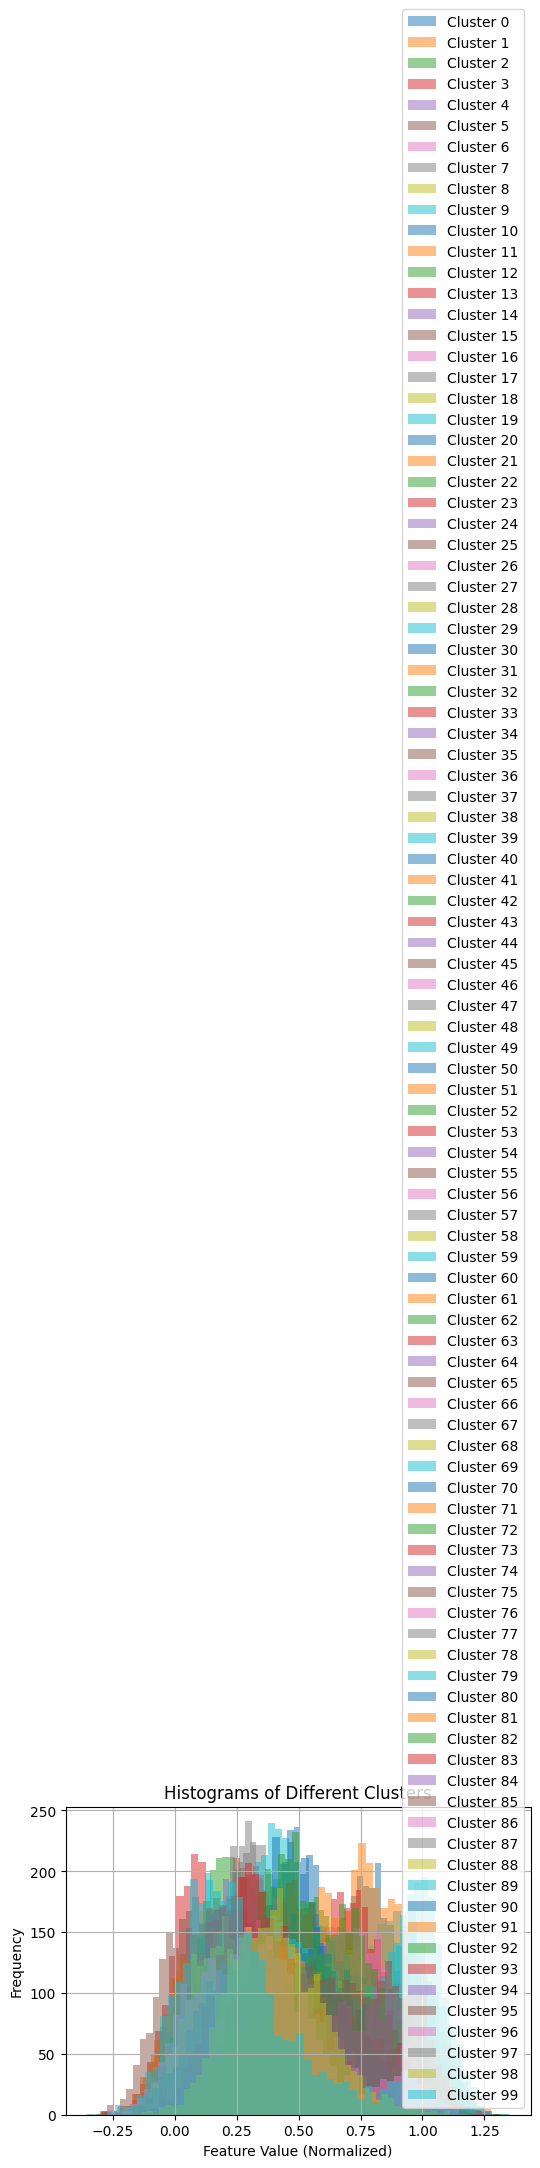

In [ ]:
# Add noise to the data
diffusion_steps = 10
eps = 1e-4
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms for each cluster in X_noised
plot_CIFAR10_histograms(X_noised, n_clusters)

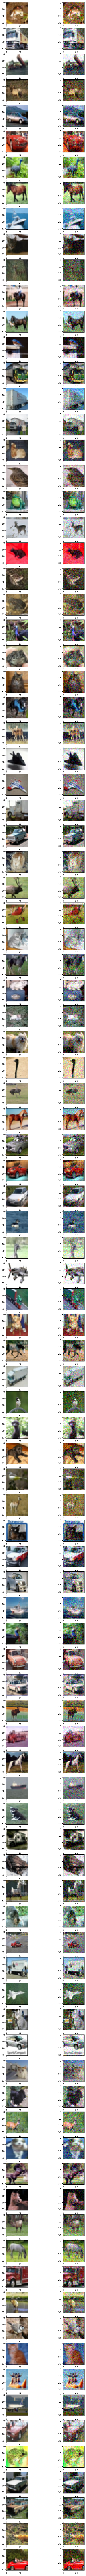

In [ ]:
plot_noisy_images(X, n_clusters)

<ipython-input-9-f0775634957b>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


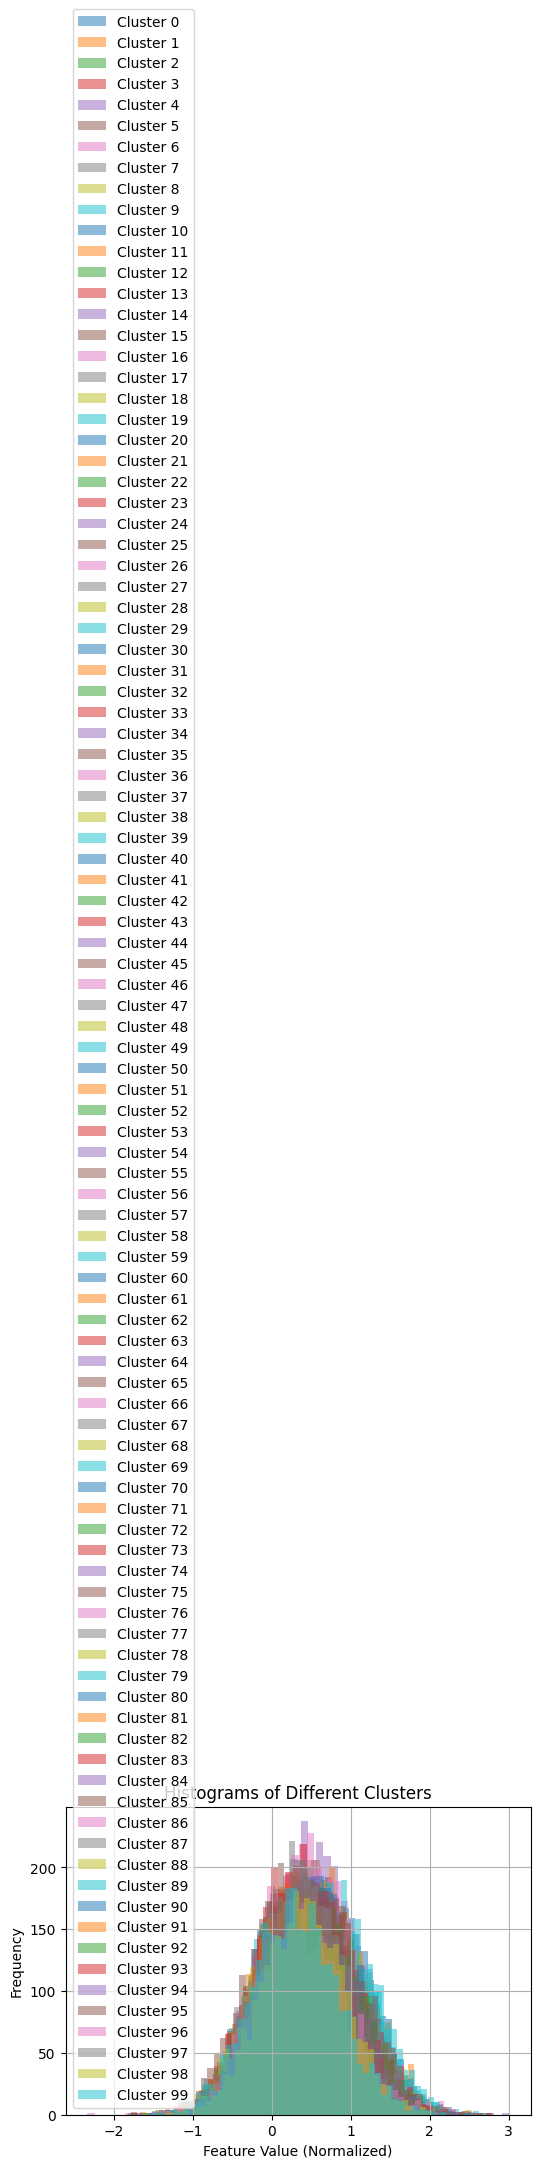

In [ ]:
# Add noise to the data
diffusion_steps = 50
eps = 1e-4
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms for each cluster in X_noised
plot_CIFAR10_histograms(X_noised, n_clusters)

<ipython-input-9-f0775634957b>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


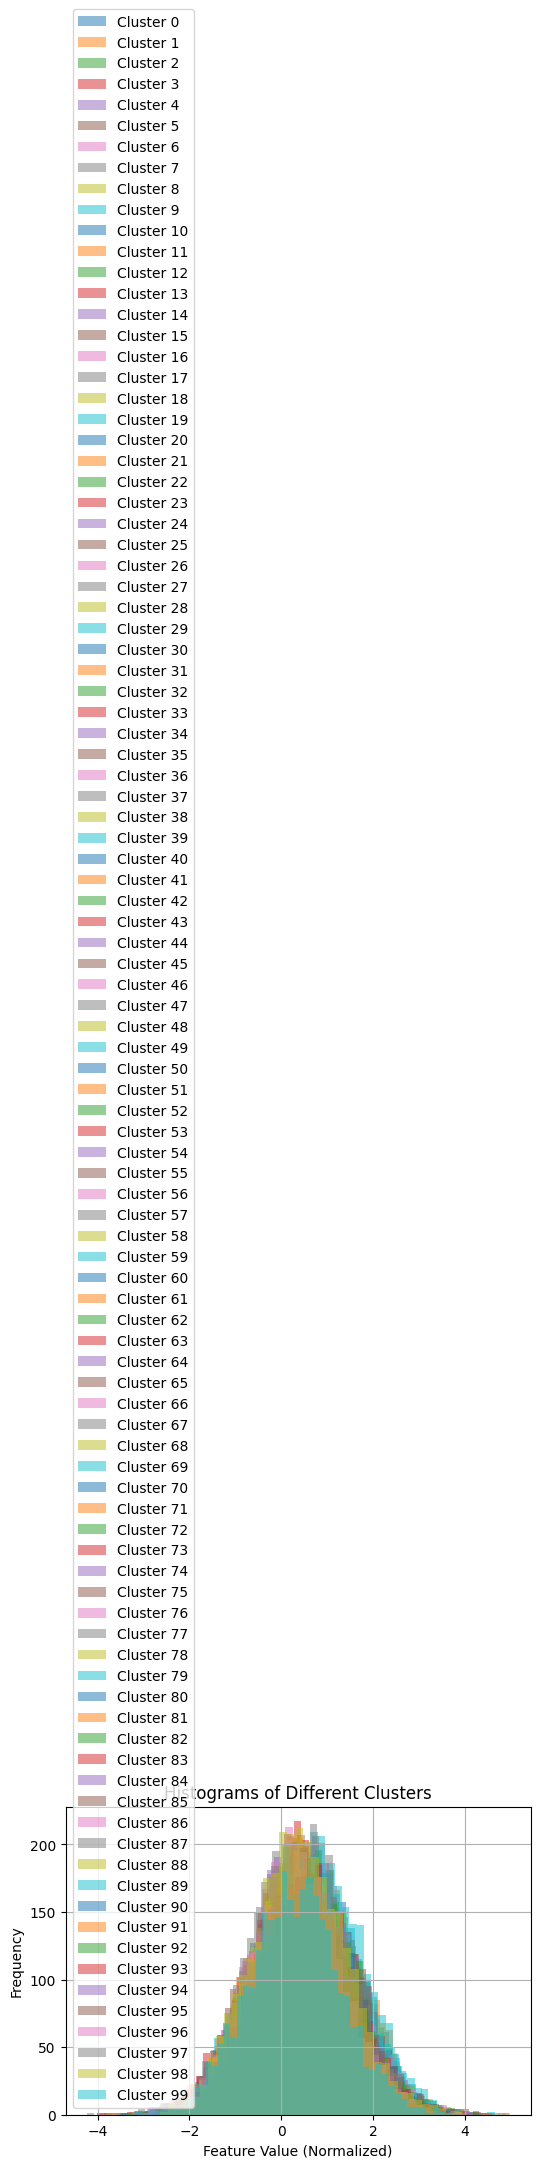

In [ ]:
# Add noise to the data
diffusion_steps = 100
eps = 1e-4
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms for each cluster in X_noised
plot_CIFAR10_histograms(X_noised, n_clusters)

In [ ]:
plot_noisy_images(X, n_clusters)

Error in callback <function flush_figures at 0x79463cae52d0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
# Add noise to the data
diffusion_steps = 200
eps = 1e-4
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms for each cluster in X_noised
plot_CIFAR10_histograms(X_noised, n_clusters)

<ipython-input-9-f0775634957b>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


KeyboardInterrupt: ignored

In [ ]:
# Add noise to the data
diffusion_steps = 2000
eps = 1e-4
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms for each cluster in X_noised
plot_CIFAR10_histograms(X_noised, n_clusters)